In [7]:
import os

# Get the current working directory
cwd = os.getcwd()
print(cwd)
os.chdir("/home/kurowskik/data_wb_iad/projekt/DeepCOVIDExplainer")

/home/kurowskik/data_wb_iad/projekt/DeepCOVIDExplainer


In [9]:
## WeightWatcher helps you choose the best pretrained model for your needs.

## You can use WeightWatcher to compare several pretrained models and choose the one with the lowest Log Norm.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8

from scipy.ndimage.interpolation import zoom
from Classifier import VGG
from Classifier import ResNet
import numpy as np
import os
from utils import gradcamutils
#from Classifier.DenseNet import densenet
from PIL import Image
import weightwatcher as ww
from Classifier.ResNet import *

In [39]:
resNetModel2 = ResNet18((224, 224, 3), 4)#, False) <- tu zmiana
resNetModel2.summary()
resNetModel2.load_weights("ResNet18_COVID19_2.h5")

reshaping via a convolution...
reshaping via a convolution...
reshaping via a convolution...
reshaping via a convolution...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 112, 112, 64) 9472        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 112, 112, 64) 256         conv2d_21[0][0]                  
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 112, 112, 64) 0           batch_normalization

In [10]:
# use this environment flag to change which GPU to use 
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # specify which GPU(s) to be used

vggModel = VGG.VGG19((224,224,3),4)
vggModel.summary()
vggModel.load_weights("VGG19_COVID19.h5") #load weights

#denseNetModel = densenet.DenseNetImageNet161(input_shape=(352,320,1),classes=4, weights=None)
#denseNetModel.summary()
#denseNetModel.load_weights("DenseNet161-COVID19.h5")

resNetModel = ResNet18((224, 224, 3), 4)#, False) <- tu zmiana
resNetModel.summary()
resNetModel.load_weights("ResNet18_COVID19.h5")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0         
__________

In [12]:
x_test = np.load('../../data/x_test_undersampled.npy')
y_test = np.load('../../data/y_test_undersampled.npy')
x_train = np.load('../../data/x_train_undersampled.npy')
y_train = np.load('../../data/y_train_undersampled.npy')

In [14]:
from __future__ import print_function

import numpy as np
from random import shuffle
import time
import csv
from PIL import Image
import os
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras import initializers
from keras.optimizers import SGD
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential,load_model,Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import *
from keras.callbacks import CSVLogger
from keras import callbacks
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import sklearn.metrics as sklm
from utils import lossprettifier
from Classifier import VGG
from Classifier.VGG import *

In [15]:
#Image data generation for the training 
datagen = ImageDataGenerator(
               featurewise_center = False, 
               samplewise_center = False,  # set each sample mean to 0
               featurewise_std_normalization = True,  
               samplewise_std_normalization = False)  

datagen.fit(x_train) 
for i in range(len(x_test)):
      x_test[i] = datagen.standardize(x_test[i])
    

/home/kurowskik/wbiad3.6/lib/python3.6/site-packages/keras/preprocessing/image.py:657: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [16]:
#!/usr/bin/env python
# coding: utf-8

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,10

from scipy.ndimage.interpolation import zoom
from Classifier import VGG
from utils import gradcamutils
import innvestigate
import numpy as np
import os
from PIL import Image
import innvestigate

from Classifier.VGG import *

In [19]:
def readTestImage(img_path): 
    img = Image.open(img_path) #open image you want to visualize "1238_R.png"

    img = np.array(img.resize((224,224), Image.ANTIALIAS))
    imgArr = img.reshape(1,224,224,3)#open image you want to visualize
    imgNormalized = imgArr / 255.
    
    return img, imgArr, imgNormalized
#Get TensorFlow session
def get_session(): 
    config = tf.ConfigProto() 
    config.gpu_options.allow_growth = True
    return tf.Session(config=config) 
  
# One hot encoding of labels 
def dense_to_one_hot(labels_dense,num_clases=4):
    return np.eye(num_clases)[labels_dense]

In [25]:
vggWatcher = ww.WeightWatcher(model=vggModel)
resultsVGG = vggWatcher.analyze( alphas=True)

vggWatcher.print_results()
vggWatcher.get_summary()

vggWatcherDetails = vggWatcher.get_details(results=resultsVGG)

2021-05-05 18:45:56,380 INFO 

python      version 3.6.13 (default, Mar 10 2021, 09:22:25) 
[GCC 10.2.0]
numpy       version 1.19.5
tensforflow version 1.14.0
keras       version 2.1.6
2021-05-05 18:45:56,385 INFO Analyzing model 'vgg19' with 27 layers
/home/kurowskik/wbiad3.6/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/kurowskik/wbiad3.6/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/kurowskik/wbiad3.6/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/kurowskik/wbiad3.6/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
2021-05-05 18:46:04,959 INFO ### Printing results ###
2021-05

In [32]:
y_predict_vgg = vggModel.predict( x_test)
y_predict_resNet = resNetModel.predict( x_test)
print(y_predict_vgg)
print( y_predict_resNet)

[[2.91158119e-03 5.92474937e-01 4.04608607e-01 4.87525449e-06]
 [1.03680128e-02 9.58365202e-01 3.11657116e-02 1.00973230e-04]
 [7.53851095e-03 9.84752357e-01 7.68098840e-03 2.81228258e-05]
 ...
 [8.70814800e-01 1.41583411e-02 1.10886976e-01 4.13988018e-03]
 [3.56246494e-02 4.45765644e-01 5.17861009e-01 7.48768041e-04]
 [3.97897363e-01 3.16360109e-02 5.66563964e-01 3.90262878e-03]]
[[2.9175014e-09 1.0000000e+00 2.1606193e-12 5.1905764e-19]
 [1.1836700e-10 1.0000000e+00 2.4947742e-18 7.6284876e-25]
 [6.5826606e-07 9.9999928e-01 6.5626518e-11 7.6976215e-16]
 ...
 [1.7637292e-06 9.9999821e-01 8.9750984e-12 1.2503853e-15]
 [8.5307955e-11 1.0000000e+00 1.9396156e-17 1.1754145e-23]
 [1.7010617e-10 1.0000000e+00 2.3177762e-12 3.2267910e-18]]


In [43]:
y_predict_resNet_2 = resNetModel2.predict( x_test)
print( y_predict_resNet_2)

[[5.0380253e-03 9.9496102e-01 9.8266241e-07 8.9243085e-11]
 [1.3579270e-04 9.9986422e-01 1.1884010e-08 3.5495120e-13]
 [1.7450158e-01 8.2549113e-01 7.2997418e-06 3.2993965e-09]
 ...
 [5.7008531e-02 9.4298553e-01 5.9319182e-06 6.5872685e-09]
 [1.2244086e-04 9.9987757e-01 1.5000943e-09 5.5450658e-13]
 [2.9175497e-05 9.9997067e-01 8.3505768e-08 5.7380493e-11]]


In [44]:
y_predict_ensembled = (y_predict_vgg + y_predict_resNet_2)/2
print( y_predict_ensembled)

[[3.9748033e-03 7.9371798e-01 2.0230480e-01 2.4376718e-06]
 [5.2519026e-03 9.7911471e-01 1.5582861e-02 5.0486615e-05]
 [9.1020048e-02 9.0512174e-01 3.8441441e-03 1.4063063e-05]
 ...
 [4.6391165e-01 4.7857195e-01 5.5446453e-02 2.0699434e-03]
 [1.7873544e-02 7.2282159e-01 2.5893050e-01 3.7438402e-04]
 [1.9896327e-01 5.1580334e-01 2.8328201e-01 1.9513144e-03]]


In [45]:
decoded = np.argmax(  y_predict_ensembled, axis = 1)
print(decoded)

[1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [46]:
modelPath = "VGG19_COVID19_undersampled_l1.h5"
resultPath = 'ensembled_undersampled.txt'

In [49]:
y_pred = decoded

f = open(resultPath,'a') #create classification report
f.write(classification_report(y_test, y_pred))
f.write(str(sklm.cohen_kappa_score(y_test, y_pred))+"\n")

#Print class-wise classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.04      0.08       100
           1       0.33      0.94      0.49       100
           2       0.20      0.02      0.04       100

    accuracy                           0.33       300
   macro avg       0.44      0.33      0.20       300
weighted avg       0.44      0.33      0.20       300



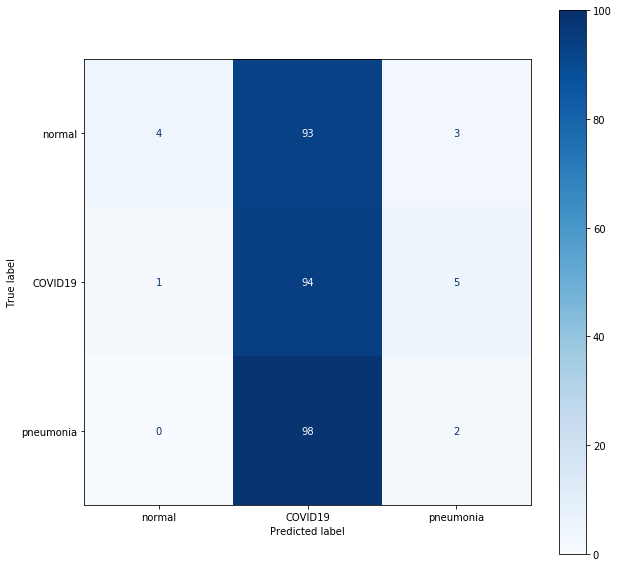

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array(['normal', 'COVID19', 'pneumonia']))
disp.plot(cmap='Blues') 
disp.ax_.get_images()[0].set_clim(0, 100)

In [51]:
# use this environment flag to change which GPU to use 
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # specify which GPU(s) to be used

vggModel = VGG.VGG19((224,224,3),4)
vggModel.summary()
vggModel.load_weights("VGG19_COVID19.h5") #load weights

vggModel_under = VGG.VGG19((224,224,3),4)
vggModel_under.summary()
vggModel_under.load_weights("VGG19_COVID19_undersampled.h5") #load weights

vggModel_under_fft = VGG.VGG19((224,224,3),4)
vggModel_under_fft.summary()
vggModel_under_fft.load_weights("VGG19_COVID19_undersampled_fft.h5") #load weights

vggModel_under_l1 = VGG.VGG19((224,224,3),4)
vggModel_under_l1.summary()
vggModel_under_l1.load_weights("VGG19_COVID19_undersampled_l1.h5") #load weights

vggModel_under_l2 = VGG.VGG19((224,224,3),4)
vggModel_under_l2.summary()
vggModel_under_l2.load_weights("VGG19_COVID19_undersampled_l2.h5") #load weights

vggModel_under_l1_and_l2 = VGG.VGG19((224,224,3),4)
vggModel_under_l1_and_l2.summary()
vggModel_under_l1_and_l2.load_weights("VGG19_COVID19_undersampled_l1_and_l2.h5") #load weights

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0         
__________

In [ ]:
vggModel_under_fft
vggModel_under_l1
vggModel_under_l2
vggModel_under_l1_and_l2

In [52]:
y_predict_vgg = vggModel.predict( x_test)
y_predict_vgg_under = vggModel_under.predict( x_test)
y_predict_vgg_under_fft = vggModel_under_fft.predict( x_test)
y_predict_vgg_under_l1 = vggModel_under_l1.predict( x_test)
y_predict_vgg_under_l2 = vggModel_under_l2.predict( x_test)
y_predict_vgg_under_l1_and_l2 = vggModel_under_l1_and_l2.predict( x_test)
print( y_predict_vgg)
print( y_predict_vgg_under)
print( y_predict_vgg_under_fft)
print( y_predict_vgg_under_l1)
print( y_predict_vgg_under_l2)
print( y_predict_vgg_under_l1_and_l2)

[[2.91158119e-03 5.92474937e-01 4.04608607e-01 4.87525449e-06]
 [1.03680128e-02 9.58365202e-01 3.11657116e-02 1.00973230e-04]
 [7.53851095e-03 9.84752357e-01 7.68098840e-03 2.81228258e-05]
 ...
 [8.70814800e-01 1.41583411e-02 1.10886976e-01 4.13988018e-03]
 [3.56246494e-02 4.45765644e-01 5.17861009e-01 7.48768041e-04]
 [3.97897363e-01 3.16360109e-02 5.66563964e-01 3.90262878e-03]]
[[2.6466563e-02 9.4025224e-01 3.3271074e-02 1.0131487e-05]
 [2.1389337e-01 5.6577623e-01 2.1916986e-01 1.1605215e-03]
 [2.0536330e-01 7.4732864e-01 4.7250371e-02 5.7606831e-05]
 ...
 [5.8983456e-02 3.6290634e-01 5.7773715e-01 3.7305991e-04]
 [1.5579696e-01 2.1973516e-01 6.2360543e-01 8.6250331e-04]
 [1.4865933e-03 4.6536992e-03 9.9385965e-01 3.3124760e-08]]
[[9.9709608e-02 6.8298572e-01 2.1653312e-01 7.7162142e-04]
 [1.0489115e-01 4.7298104e-01 4.2138112e-01 7.4669858e-04]
 [5.5272132e-01 3.2466856e-01 1.2111582e-01 1.4944004e-03]
 ...
 [3.1345600e-01 4.1783251e-02 6.4467818e-01 8.2556689e-05]
 [7.1163870e-02

In [69]:
y_predict_ensembled_vgg = (y_predict_vgg +\
                           y_predict_vgg_under+ \
                           y_predict_vgg_under_fft + \
                           y_predict_vgg_under_l1+ \
                           y_predict_vgg_under_l2+ \
                           y_predict_vgg_under_l1_and_l2 )/6
print( y_predict_ensembled_vgg)

[[1.16007708e-01 6.99388742e-01 1.83561504e-01 1.04204251e-03]
 [1.23146355e-01 6.17240369e-01 2.58256346e-01 1.35692244e-03]
 [2.70260602e-01 6.22816920e-01 1.05473347e-01 1.44908985e-03]
 ...
 [2.86867350e-01 1.77479818e-01 5.33848822e-01 1.80404074e-03]
 [7.57709742e-02 3.78133982e-01 5.45273840e-01 8.21253459e-04]
 [1.16522573e-01 4.45364825e-02 8.37799132e-01 1.14176760e-03]]


In [70]:
y_pred = np.argmax(  y_predict_ensembled_vgg, axis = 1)
print( y_pred)

[1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 0 2 1 2 1 1 2 1 1 1 1 1 2
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 1 2 0 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 0 0 1 0 0 2 0
 0 0 0 1 1 0 0 1 1 0 0 0 2 2 1 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 2 2 1 2 0 1 0 0 0 1 0 0 1 1 1 2 0 0 1 2 1 0 0 0 0 0 1 0 0 1 2 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 2 0 0 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2
 0 2 1 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 0 2 2 1 1 0 2 2 0 2 2 2 2
 2 2 2 2 2 2 1 2 0 2 0 2 0 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 0 2
 2 2 2 2]


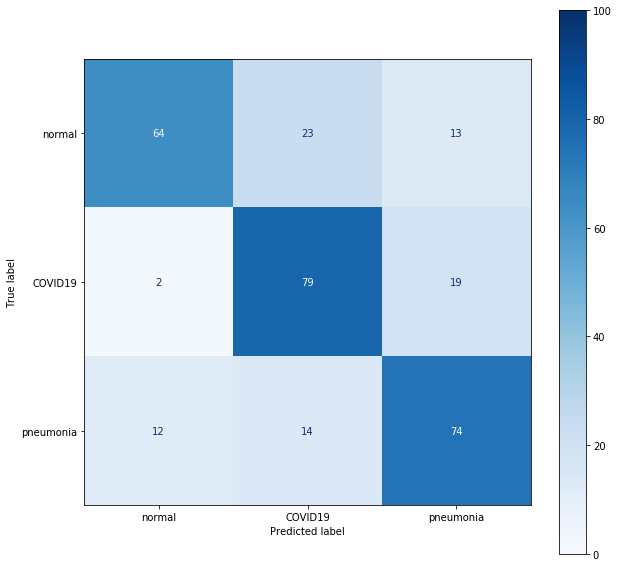

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array(['normal', 'COVID19', 'pneumonia']))
disp.plot(cmap='Blues') 
disp.ax_.get_images()[0].set_clim(0, 100)

In [75]:
y_predict_ensembled_vgg2 = (y_predict_vgg +\
                           y_predict_vgg_under+ \
                           #y_predict_vgg_under_fft + \
                           y_predict_vgg_under_l1+ \
                           y_predict_vgg_under_l2+ \
                           y_predict_vgg_under_l1_and_l2 )/5
print( y_predict_ensembled_vgg2)

[[0.11926732 0.7026693  0.17696719 0.00109613]
 [0.12679741 0.64609224 0.2256314  0.00147897]
 [0.21376845 0.6824466  0.10234485 0.00144003]
 ...
 [0.2815496  0.20461914 0.5116829  0.00214834]
 [0.07669239 0.40812364 0.51429564 0.00088839]
 [0.13757889 0.05322539 0.80782557 0.00137012]]


In [76]:
y_pred2 = np.argmax(  y_predict_ensembled_vgg2, axis = 1)
print( y_pred2)

[1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 2
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 1 2 0 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 0 0 1 1 0 0 1 1 0 0 0 2 0 1 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 2 2 1 2 0 1 0 0 0 1 0 0 1 1 1 2 0 0 1 2 1 1 0 0 0 0 1 0 1 1 2 1 2 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 2 2 2 2 2 0 2 2 2 2 2 1 1 2 2 1 2 2 2 2 2
 0 2 1 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 0 2 2 1 1 0 2 2 0 0 2 2 2
 2 1 2 2 2 2 1 2 0 2 1 1 0 2 2 2 2 0 1 1 2 2 1 2 2 2 2 2 2 1 1 1 2 2 1 0 2
 2 2 2 2]


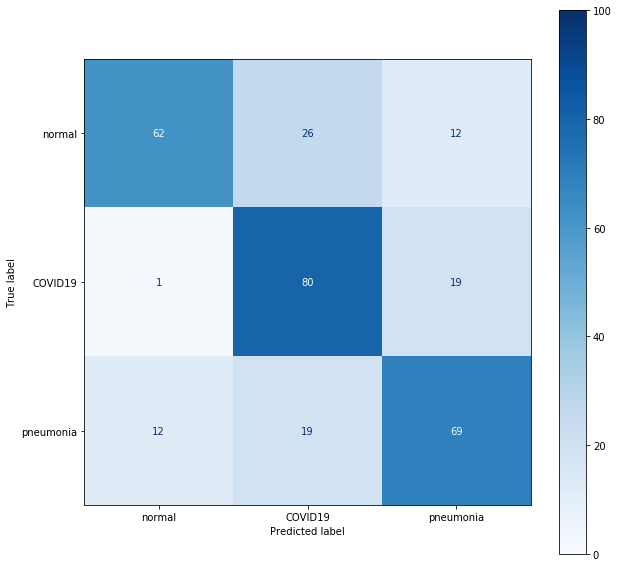

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array(['normal', 'COVID19', 'pneumonia']))
disp.plot(cmap='Blues') 
disp.ax_.get_images()[0].set_clim(0, 100)